# Analyzing Happiness Around the World 2015-2021

## Importing Libraries

In [128]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px


## Importing and Reading Data

In [38]:
happiness_df = pd.read_csv("happiness_data.csv")
happiness_df.head()

,country,region,sub_region,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,happiness_score,happy
0,Afghanistan,Asia,Southern Asia,2008,0.372359,0.730257,0.450662,0.505,0.718114,0.173169,0.118314,0.414297,0.258195,0.612072,4.352441,0.0
1,Afghanistan,Asia,Southern Asia,2009,0.440178,0.747245,0.552308,0.508,0.678896,0.195469,0.149965,0.481421,0.237092,0.611545,4.602120,0.0
2,Afghanistan,Asia,Southern Asia,2010,0.475838,0.757918,0.539075,0.511,0.600127,0.125859,0.293234,0.516907,0.275324,0.299357,4.394640,0.0
3,Afghanistan,Asia,Southern Asia,2011,0.383172,0.755201,0.521104,0.514,0.495901,0.167723,0.268891,0.479835,0.267175,0.307386,4.160387,0.0
4,Afghanistan,Asia,Southern Asia,2012,0.378294,0.763795,0.520637,0.517,0.530935,0.241247,0.224380,0.613513,0.267919,0.435440,4.493160,0.0


In [39]:
happiness_df = happiness_df[happiness_df.year >= 2015]

In [40]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 7 to 1747
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            821 non-null    object 
 1   region                             821 non-null    object 
 2   sub_region                         821 non-null    object 
 3   year                               821 non-null    int64  
 4   life_ladder_log                    820 non-null    float64
 5   gdp_per_capita                     821 non-null    float64
 6   social_support                     821 non-null    float64
 7   healthy_life_expectancy_at_birth   821 non-null    float64
 8   freedom_to_make_life_choices       821 non-null    float64
 9   generosity                         821 non-null    float64
 10  perceptions_of_corruption          820 non-null    float64
 11  positive_affect                    820 non-null    float6

In [41]:
happiness_df.describe()

,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,happiness_score,happy
count,821.000000,820.000000,821.000000,821.000000,821.000000,821.000000,821.000000,820.000000,820.000000,820.000000,820.000000,821.000000,820.000000
mean,2017.844093,0.553844,0.944359,0.814529,0.642063,0.779128,0.001326,0.266398,0.659646,0.289385,0.493441,5.451455,0.485366
std,1.958111,0.113472,0.117544,0.128204,0.066764,0.120126,0.157839,0.188213,0.103498,0.085829,0.197336,0.706959,0.500091
min,2015.000000,0.217881,0.552672,0.290184,0.422500,0.303540,-0.335739,0.030517,0.263487,0.103494,0.079710,3.476845,0.000000
25%,2016.000000,0.468181,0.849951,0.739817,0.591500,0.707403,-0.109487,0.139435,0.587183,0.223077,0.329496,4.990408,0.000000
50%,2018.000000,0.557826,0.956326,0.844592,0.658000,0.799745,-0.023983,0.205944,0.671708,0.277212,0.478485,5.323709,0.000000
75%,2019.000000,0.632707,1.038451,0.912455,0.694250,0.874548,0.090771,0.320283,0.740238,0.344801,0.629200,5.769163,1.000000
max,2021.000000,0.788935,1.380000,1.642000,1.026000,0.985178,0.698338,0.952689,0.883586,0.599335,0.993604,7.769000,1.000000


## Cleaning data

In [42]:
happiness_df = happiness_df.drop_duplicates()
happiness_df=happiness_df.dropna()

In [43]:
happiness_df.drop('happy', axis = 1, inplace = True)

In [44]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 7 to 1747
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            820 non-null    object 
 1   region                             820 non-null    object 
 2   sub_region                         820 non-null    object 
 3   year                               820 non-null    int64  
 4   life_ladder_log                    820 non-null    float64
 5   gdp_per_capita                     820 non-null    float64
 6   social_support                     820 non-null    float64
 7   healthy_life_expectancy_at_birth   820 non-null    float64
 8   freedom_to_make_life_choices       820 non-null    float64
 9   generosity                         820 non-null    float64
 10  perceptions_of_corruption          820 non-null    float64
 11  positive_affect                    820 non-null    float6

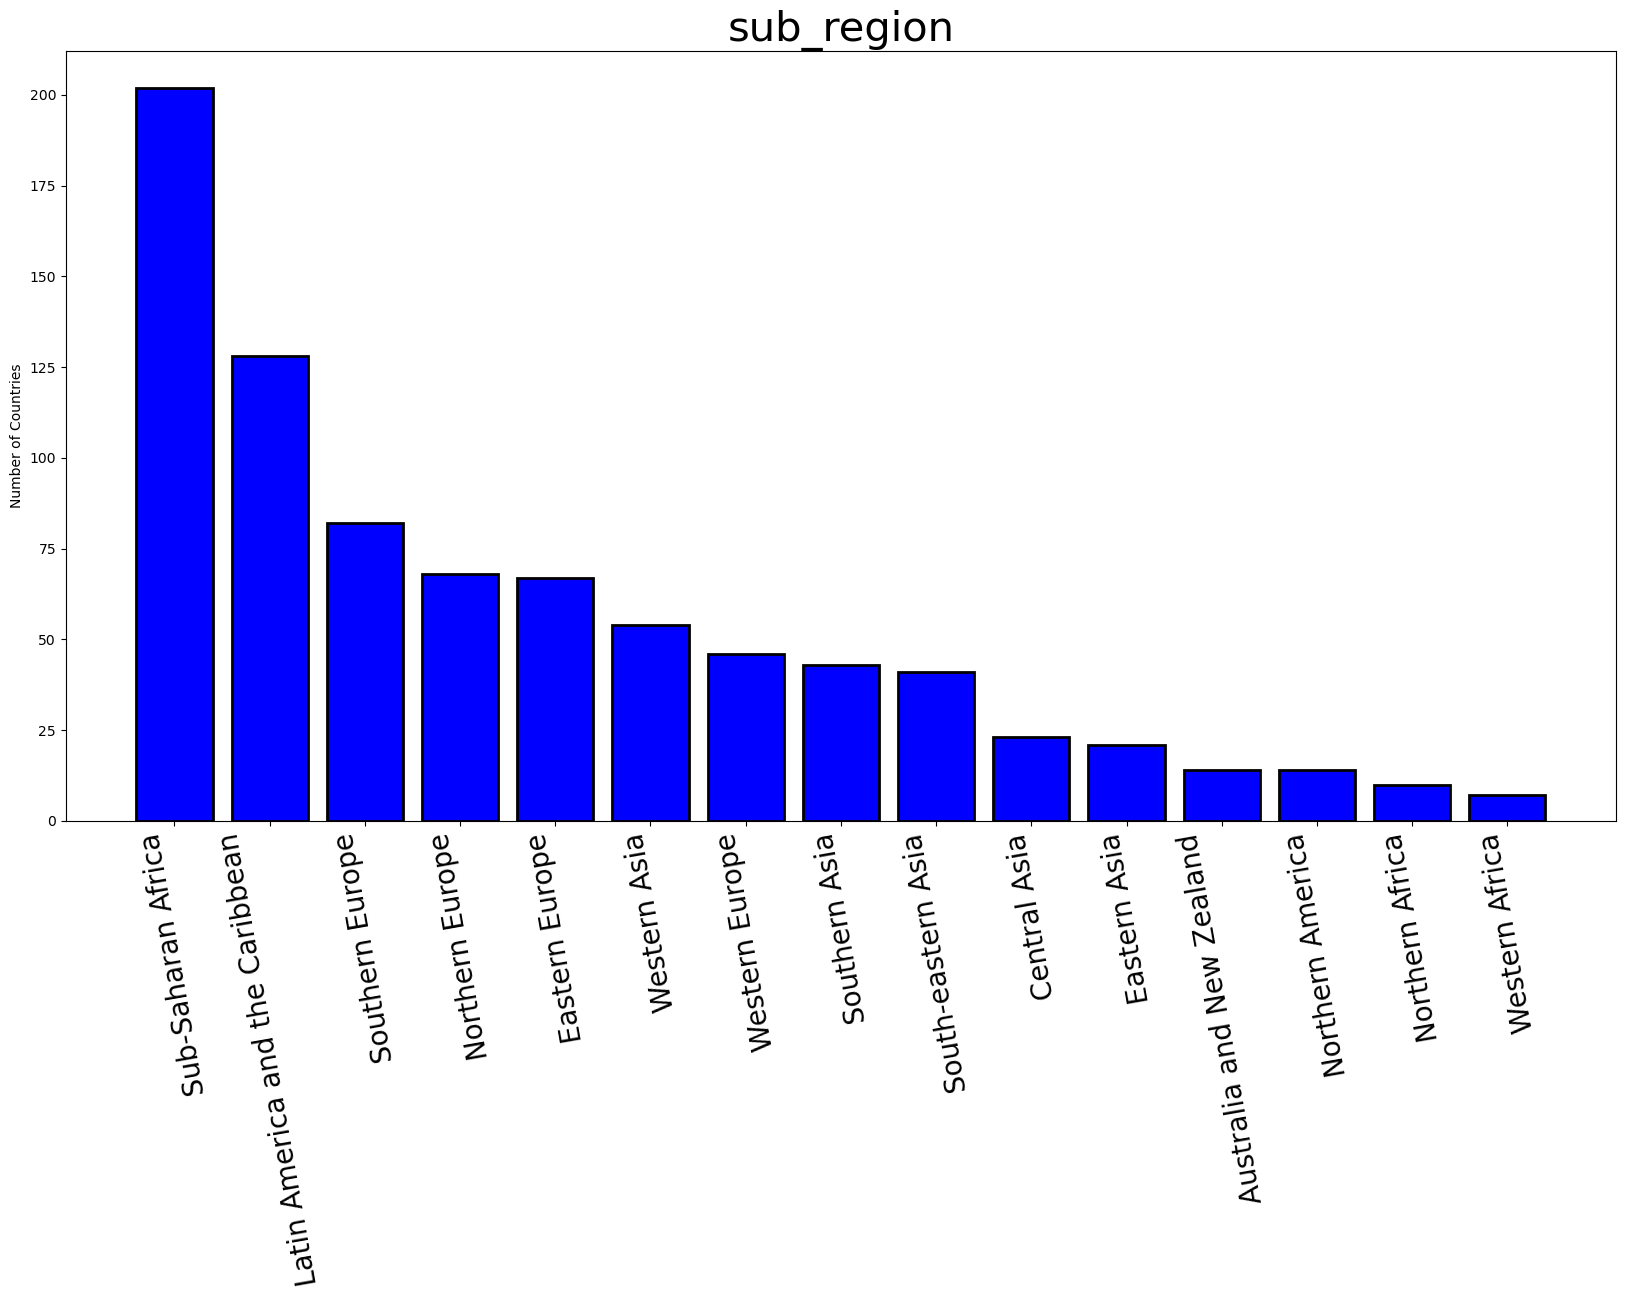

In [45]:
# Region & Sub_region

# Define Region
regions = happiness_df["sub_region"]


# How many countries are there
regions_counts = regions.value_counts()


plt.figure(figsize=(20,10))
plt.bar(regions_counts.index, regions_counts.values,color = "Blue", edgecolor = "black", linewidth = 2)
plt.xticks(rotation = "100",size = 20)
plt.ylabel("Number of Countries")
plt.title("sub_region",size = 30)
plt.show()

In [46]:
# Total countries in each sub-region
total_country = happiness_df.groupby('sub_region')[['country']].count()
total_country.head(15)

,country
sub_region,
Australia and New Zealand,14
Central Asia,23
Eastern Asia,21
Eastern Europe,67
Latin America and the Caribbean,128
Northern Africa,10
Northern America,14
Northern Europe,68
South-eastern Asia,41


### The region with the most countries is the Sub Saharan Africa followed by Latin America/Carribbean.  And the lowest region is North and West Africa.

In [47]:
# Number of Countries
happiness_df["country"].unique()


array(['Afghanistan', 'Albania', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium',
       'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia',
       'Comoros', 'Republic of the Congo',
       'Democratic Republic of the Congo', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Swaziland',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'French Guiana',
       'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       'Laos', 'Latvia', 'Lebanon', 'Lesotho', '

### There is about 150 countries in this data

# Visualiztions

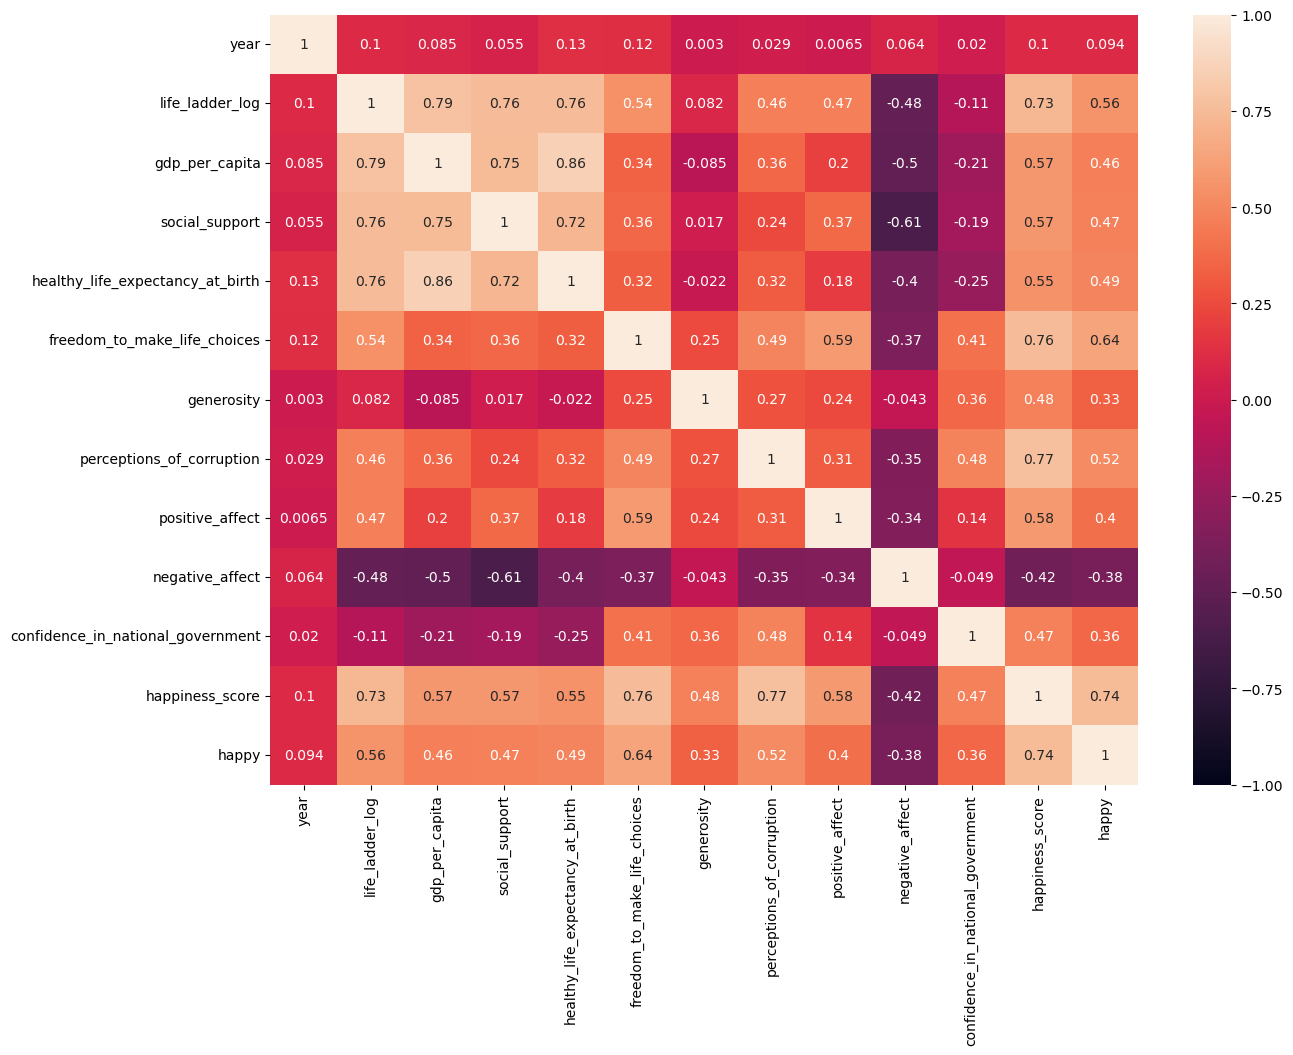

In [129]:
# Happiness Visual
plt.figure(figsize=(14,10))
sns.heatmap(happiness_df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

### The heatmap above shows that life ladder, gdp per capita, freedom to make choices, healthy life, generosity, perception of corruption, social support, and confidence in the government all contribute to the happiness score.  Most categories scored between vmin=-0.50 and vmin=-1.00

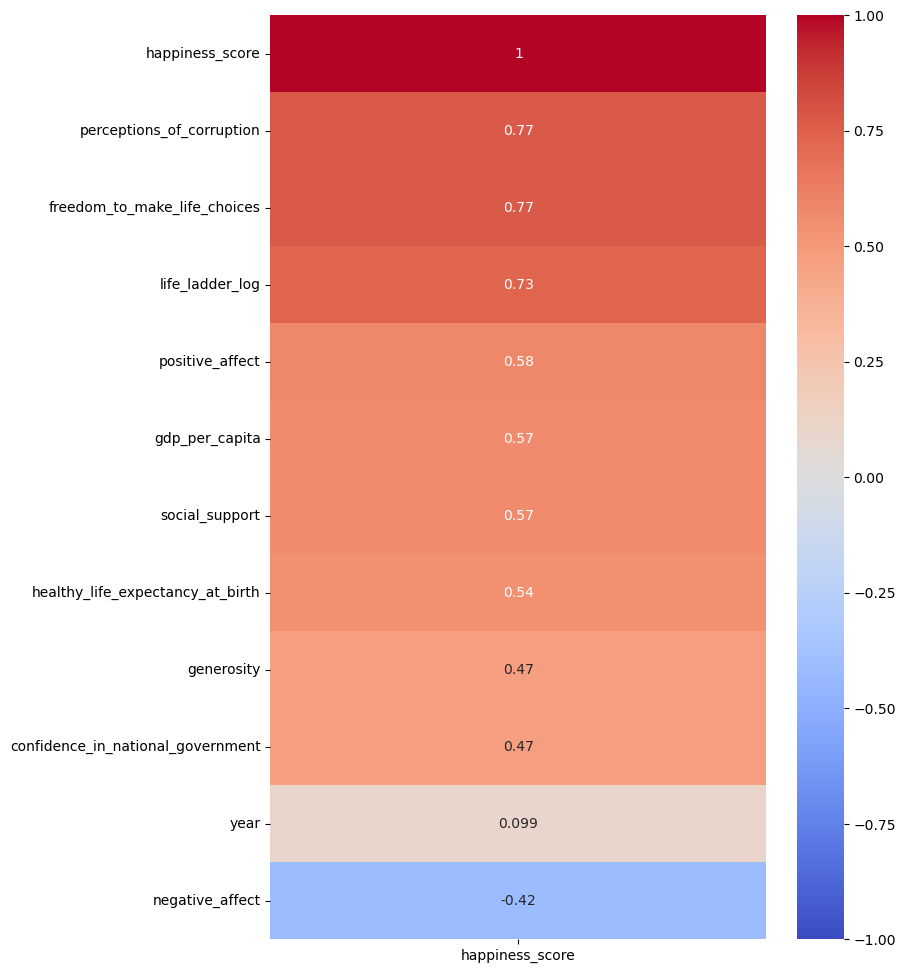

In [49]:
#set the plot size
plt.figure(figsize=(8,12))

#create a heatmap
sns.heatmap(happiness_df.corr()[['happiness_score']].sort_values('happiness_score', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

### The heatmap above shows that life ladder, gdp per capita, freedom to make choices, healthy life, generosity, perception of corruption, social support, and confidence in the government all contribute to the happiness score. However, people's perceptions of corruption and the freedom to make life choices scored higher.

In [127]:
# Happniess with the government
government = happiness_df.groupby('sub_region')[['confidence_in_national_government']].mean()
government

,confidence_in_national_government
sub_region,
Australia and New Zealand,0.547764
Central Asia,0.737199
Eastern Asia,0.336549
Eastern Europe,0.320344
Latin America and the Caribbean,0.361464
Northern Africa,0.448048
Northern America,0.490173
Northern Europe,0.499188
South-eastern Asia,0.736456


Text(0, 0.5, 'Happiness Score')

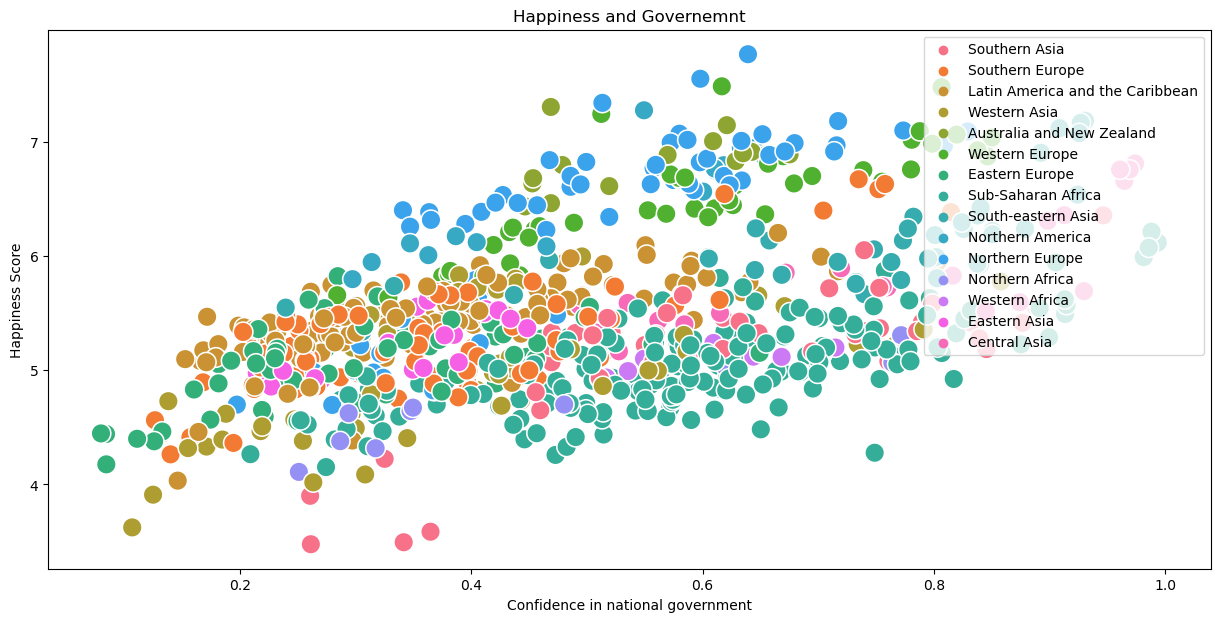

In [126]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness and Governemnt')
sns.scatterplot(x = happiness_df.confidence_in_national_government, y = happiness_df.happiness_score, hue = happiness_df.sub_region, s=200);

plt.legend(loc = 'upper right', fontsize = '10')
plt.xlabel('Confidence in national government')
plt.ylabel('Happiness Score')


### Northern Europe was the region that came on top with trusting their government or having no problems with their government; the lowest region was Southern Asia.

In [123]:
life_ladder = happiness_df.groupby('sub_region')[['life_ladder_log']].mean()
life_ladder

,life_ladder_log
sub_region,
Australia and New Zealand,0.724405
Central Asia,0.578690
Eastern Asia,0.576488
Eastern Europe,0.578477
Latin America and the Caribbean,0.595632
Northern Africa,0.454093
Northern America,0.705673
Northern Europe,0.697707
South-eastern Asia,0.539175


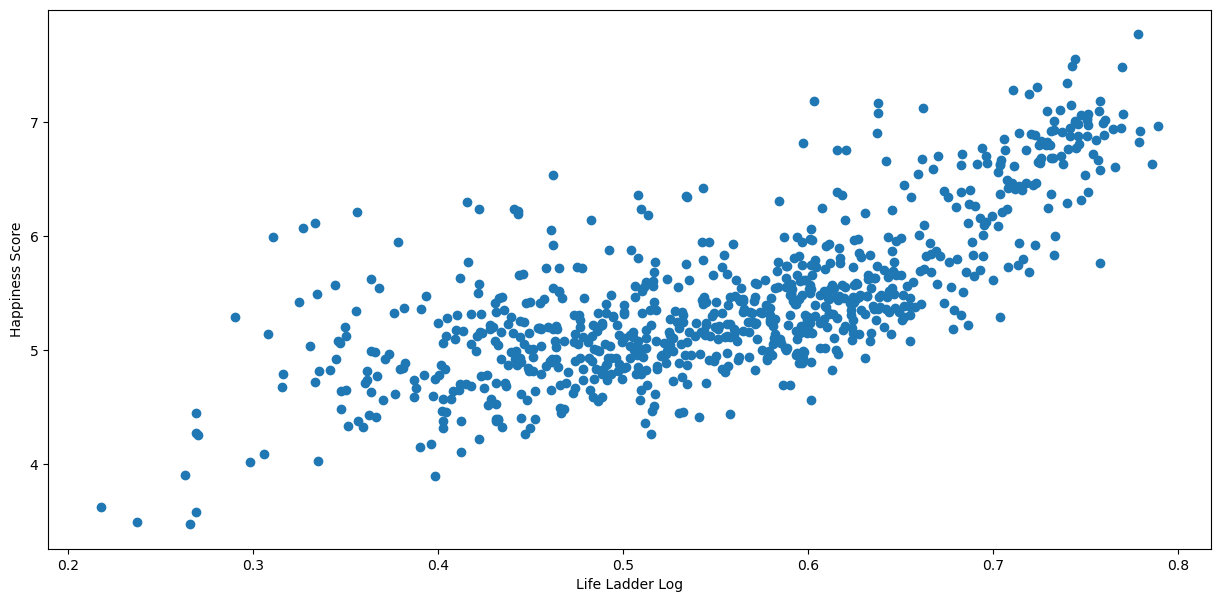

In [124]:
# Happiness and life ladder 
plt.scatter(happiness_df.life_ladder_log, happiness_df.happiness_score)
plt.xlabel('Life Ladder Log')
plt.ylabel('Happiness Score')
plt.show()


### Life Ladder impacts the happiness report, as we can see in the chart.  And if we look at the heatmap chart, we can see that there’s also a good impact between the life ladder and happiness. Australia/New Zealand and Western Europe have the higest ranks, while Sub Saharan Africa and North Africa how low ranks.

In [121]:
# Happiness and Economy
economy = happiness_df.groupby('sub_region')[['gdp_per_capita']].mean()
economy

,gdp_per_capita
sub_region,
Australia and New Zealand,1.072528
Central Asia,0.903526
Eastern Asia,1.020643
Eastern Europe,1.005585
Latin America and the Caribbean,0.935537
Northern Africa,0.930866
Northern America,1.089454
Northern Europe,1.085400
South-eastern Asia,0.943091


Text(0, 0.5, 'Happiness Score')

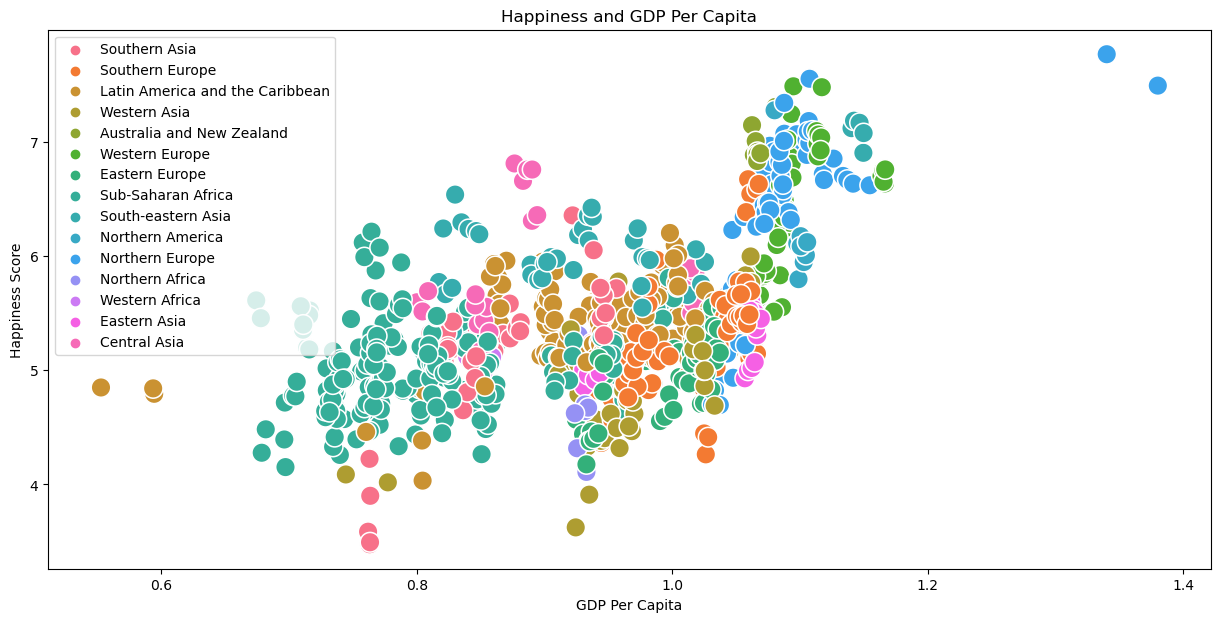

In [122]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness and GDP Per Capita')
sns.scatterplot(x = happiness_df.gdp_per_capita, y = happiness_df.happiness_score, hue = happiness_df.sub_region, s=200);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('GDP Per Capita')
plt.ylabel('Happiness Score')

### Happiness has a good impact on the Economy in many regions of the world.  As you can see in the graph above, most of these regions are in Western Europe and North America (USA).  Also, Eastern Asia and East Europe were ranked high on the chart.  The regions that ranked low were Sub-saharan Africa and West Africa. 

In [119]:
# Health and Happiness
health = happiness_df.groupby('sub_region')[['healthy_life_expectancy_at_birth']].mean()
health

,healthy_life_expectancy_at_birth
sub_region,
Australia and New Zealand,0.704750
Central Asia,0.643815
Eastern Asia,0.690000
Eastern Europe,0.662903
Latin America and the Caribbean,0.659945
Northern Africa,0.655700
Northern America,0.687375
Northern Europe,0.707464
South-eastern Asia,0.645524


<BarContainer object of 15 artists>

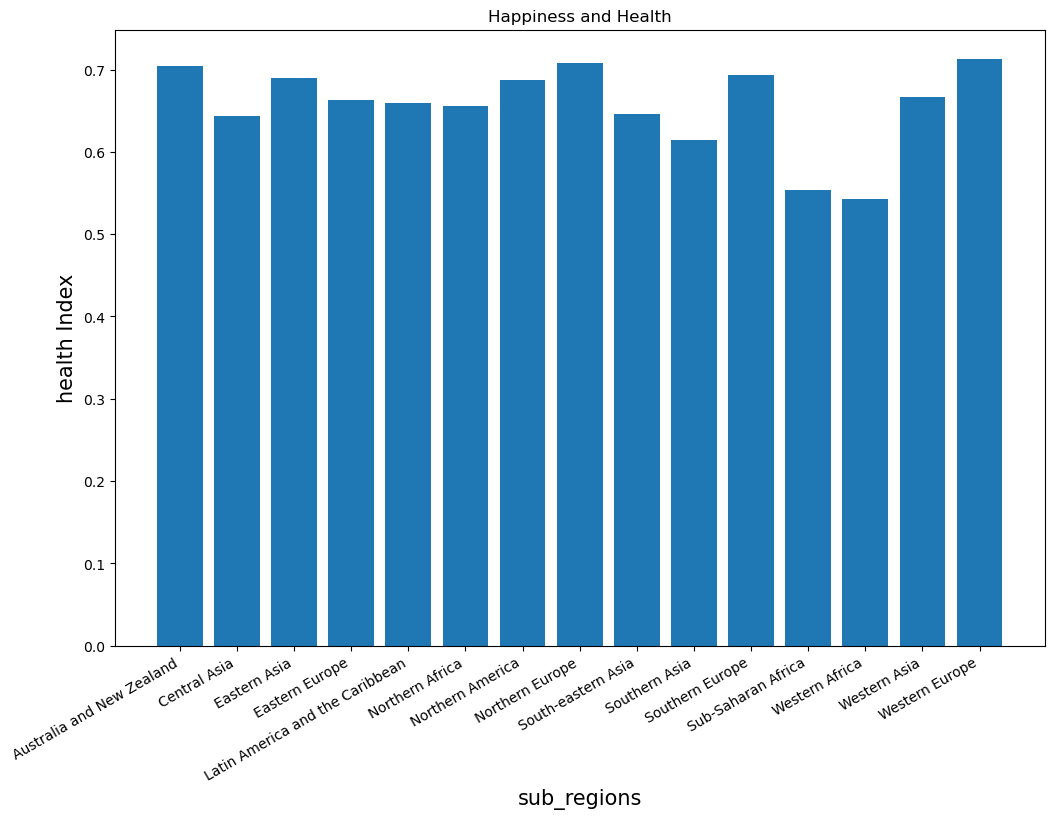

In [120]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Happiness and Health')
plt.xlabel('sub_regions', fontsize = 15)
plt.ylabel('health Index', fontsize = 15)
plt.xticks(rotation=30, ha='right')
plt.bar(health.index, health.healthy_life_expectancy_at_birth)



### Happiness and a healthy life go together very well.  Most regions scored very high; some were very close in their ranks.  The highest are West Europe and Australia and New Zealand, followed by Australia and New Zealand.  And the lowest, sub-Saharan and west Africa.

In [100]:
# Happiness and Freedom

freedom = happiness_df.groupby('sub_region')[['freedom_to_make_life_choices']].mean()
freedom

,freedom_to_make_life_choices
sub_region,
Australia and New Zealand,0.921884
Central Asia,0.869022
Eastern Asia,0.718838
Eastern Europe,0.736814
Latin America and the Caribbean,0.818388
Northern Africa,0.639132
Northern America,0.873824
Northern Europe,0.864307
South-eastern Asia,0.880340


<BarContainer object of 15 artists>

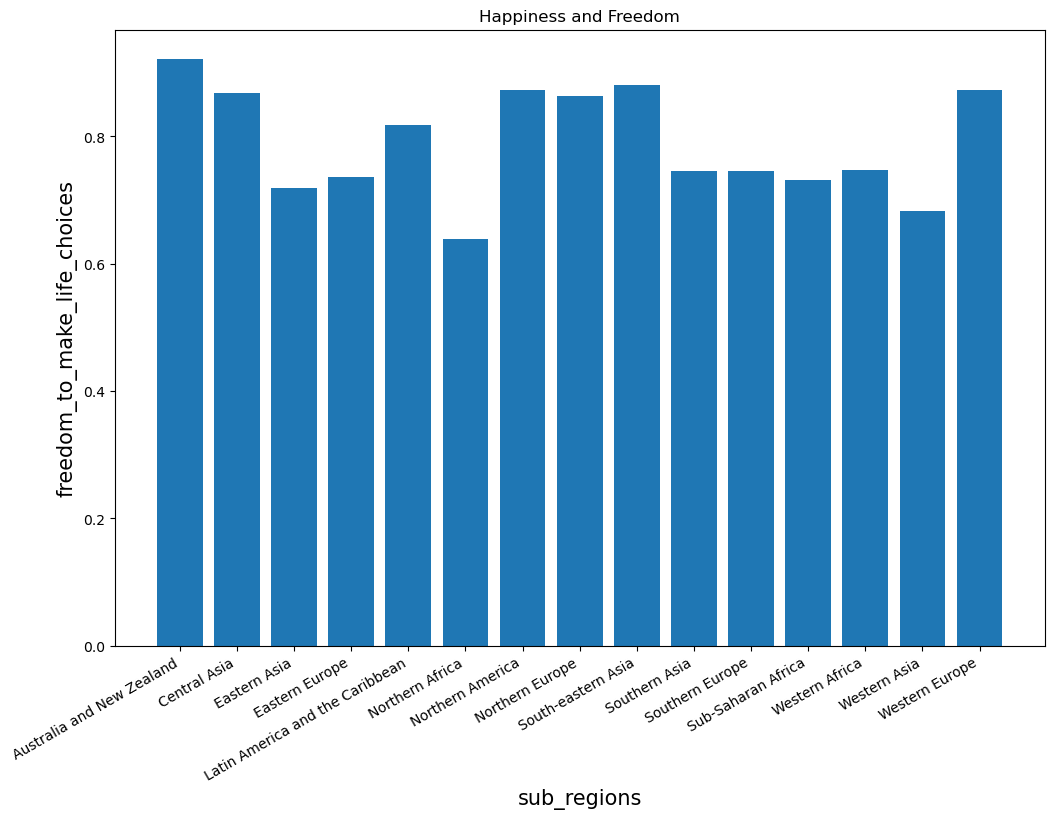

In [118]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Happiness and Freedom')
plt.xlabel('sub_regions', fontsize = 15)
plt.ylabel('freedom_to_make_life_choices', fontsize = 15)
plt.xticks(rotation=30, ha='right')
plt.bar(freedom.index, freedom.freedom_to_make_life_choices)


### Freedom to make life choices had the highest impact on the happiness report.  If we look at the heatmap, it had a high correlation with the happiness score.  Western Europe and Australia/New Zealand are very close in freedom to make choices category.  And the lowest rate was Northern Africa.

In [67]:
# Happiness and Social Support

social_support = happiness_df.groupby('sub_region')[['social_support']].mean()
social_support

,social_support
sub_region,
Australia and New Zealand,0.946908
Central Asia,0.896673
Eastern Asia,0.873663
Eastern Europe,0.897579
Latin America and the Caribbean,0.847041
Northern Africa,0.705754
Northern America,0.921512
Northern Europe,0.960097
South-eastern Asia,0.821752


Text(0, 0.5, 'Happiness Score')

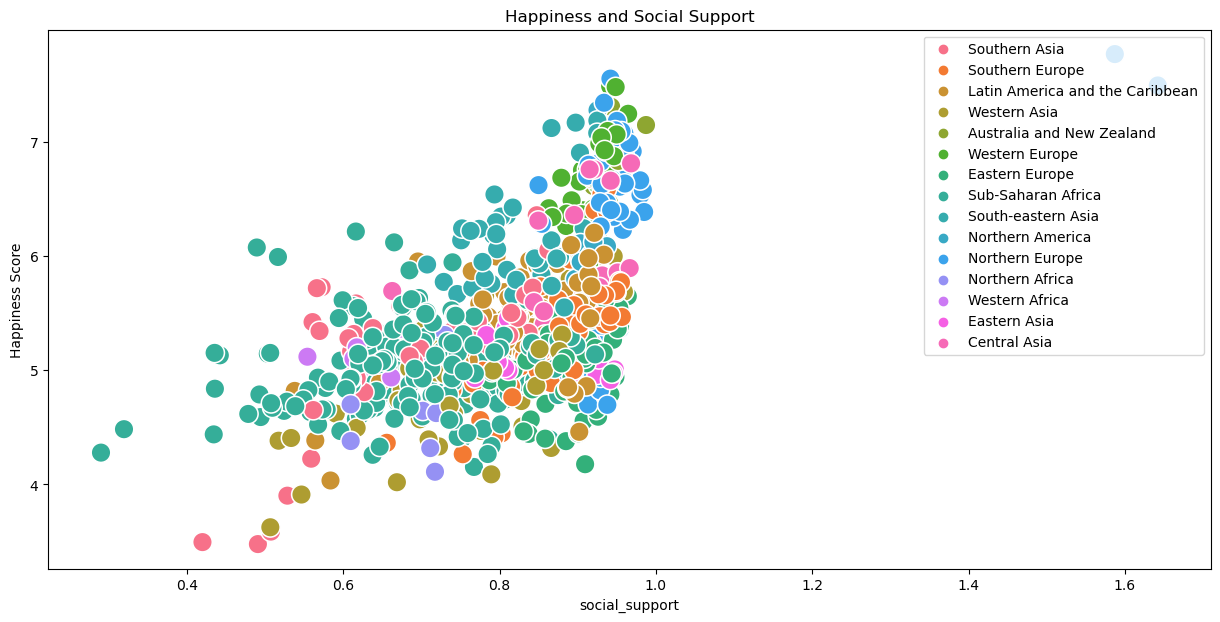

In [68]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness and Social Support')
sns.scatterplot(x = happiness_df.social_support, y = happiness_df.happiness_score, hue = happiness_df.sub_region, s=200);

plt.legend(loc = 'upper right', fontsize = '10')
plt.xlabel('social_support')
plt.ylabel('Happiness Score')

### Social Support had some impact on happiness.  Nothern Europe and New Zealand had the highest ranks, while South Asia and West Africa had the lowest rate.

In [63]:
# Happiness and Generosity

generosity = happiness_df.groupby('sub_region')[['generosity']].mean()
generosity

,generosity
sub_region,
Australia and New Zealand,0.219694
Central Asia,0.100613
Eastern Asia,-0.037310
Eastern Europe,-0.106365
Latin America and the Caribbean,-0.060698
Northern Africa,-0.190066
Northern America,0.150237
Northern Europe,0.053169
South-eastern Asia,0.256386


Text(0, 0.5, 'Happiness Score')

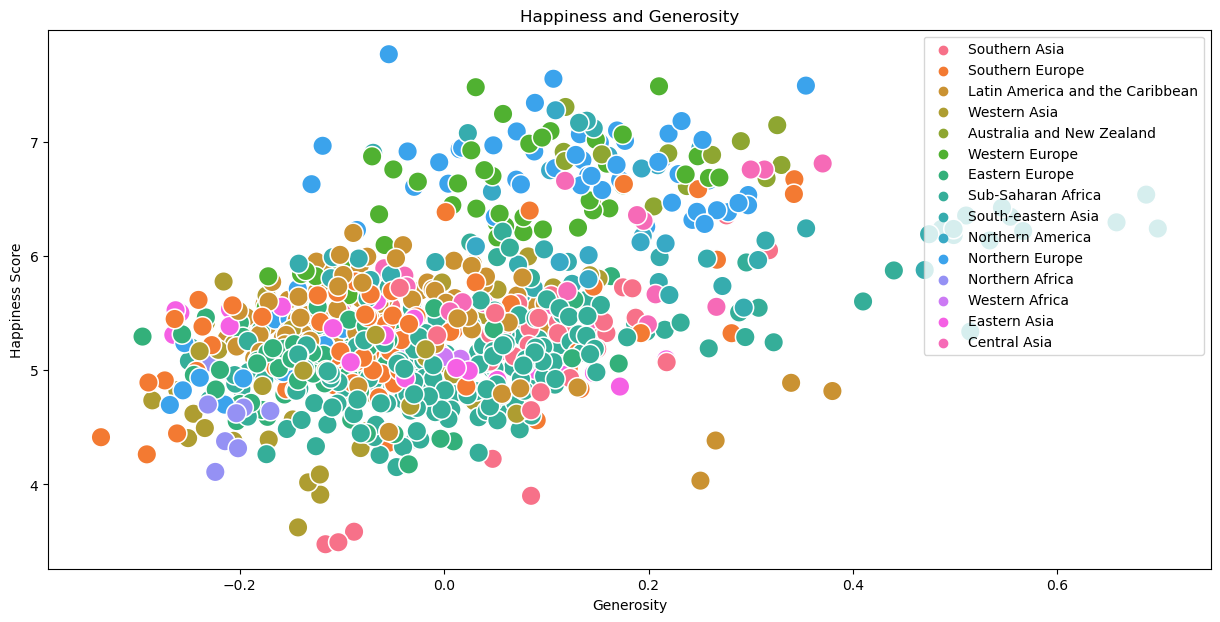

In [64]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Happiness and Generosity')
sns.scatterplot(x = happiness_df.generosity, y = happiness_df.happiness_score, hue = happiness_df.sub_region, s=200);

plt.legend(loc = 'upper right', fontsize = '10')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')



### Generosity only had some impact on the happiness score, but it some regions, we can see that generosity had some impact on them, espically in Northern Europe (Finland).  while, Eastern Asia had the lowest rate.

In [65]:
# Corruption
corruption = happiness_df.groupby('sub_region')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
sub_region,
Australia and New Zealand,0.670877
Central Asia,0.270260
Eastern Asia,0.233719
Eastern Europe,0.129179
Latin America and the Caribbean,0.208627
Northern Africa,0.188400
Northern America,0.450038
Northern Europe,0.532460
South-eastern Asia,0.291176


<BarContainer object of 15 artists>

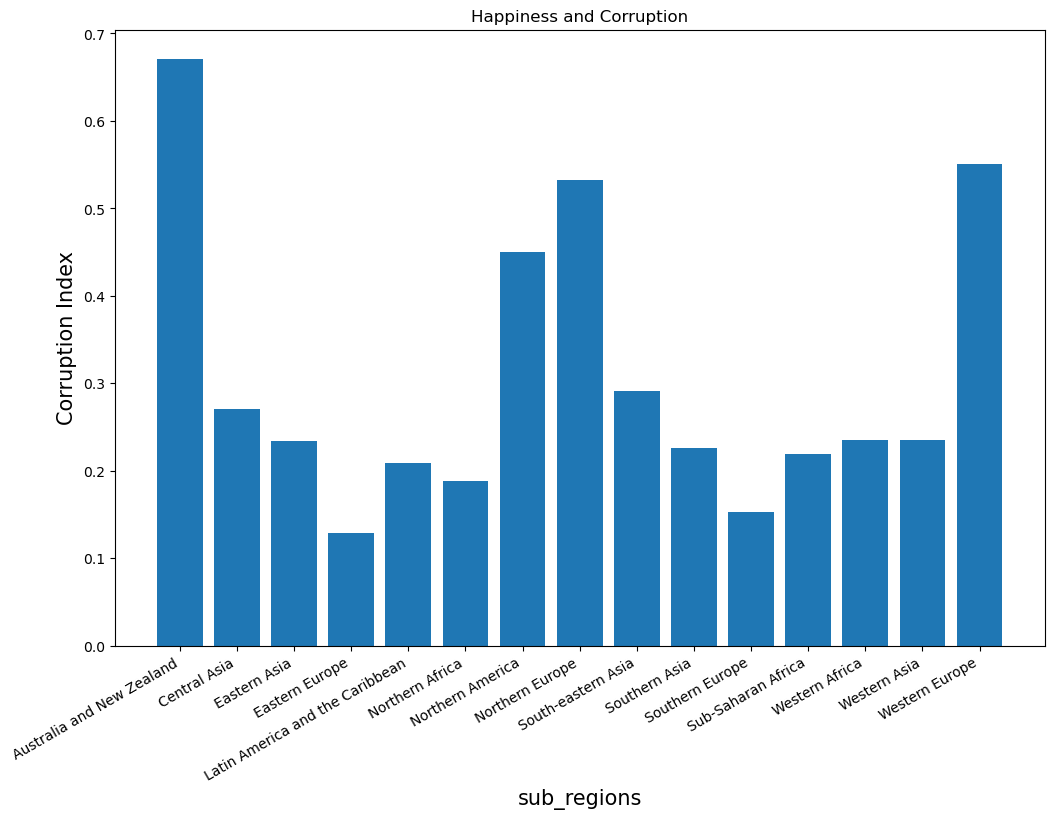

In [22]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Happiness and Corruption')
plt.xlabel('sub_regions', fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation=30, ha='right')
plt.bar(corruption.index, corruption.perceptions_of_corruption)

### Australia and New Zealand had the highest rate of perceptions of corruption while Eastern and Southern Europe had the lowest rate.  

In [135]:
top10countries = happiness_df.groupby('country').max().sort_values(by='happiness_score', ascending=False)[:40]
pd.set_option('display.max_column', None)
top10countries

,region,sub_region,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,happiness_score,happy
country,,,,,,,,,,,,,,,
Finland,Europe,Northern Europe,2021,0.788935,1.340000,1.587000,0.9860,0.963190,0.108773,0.836364,0.768806,0.192898,0.808633,7.769000,1.0
Norway,Europe,Northern Europe,2021,0.760343,1.109463,0.965962,0.7150,0.964561,0.252847,0.750289,0.809430,0.216034,0.829234,7.554000,1.0
Iceland,Europe,Northern Europe,2021,0.757549,1.380000,1.642000,1.0260,0.951610,0.354000,0.361338,0.823210,0.179504,0.633887,7.494000,1.0
Netherlands,Europe,Western Europe,2021,0.754088,1.094701,0.943956,0.7155,0.934523,0.269324,0.719395,0.747977,0.246511,0.780746,7.488000,1.0
Switzerland,Europe,Western Europe,2021,0.769422,1.116965,0.949661,0.7290,0.933947,0.174821,0.790466,0.794054,0.206317,0.849979,7.480000,1.0
Sweden,Europe,Northern Europe,2021,0.743928,1.087522,0.935582,0.7215,0.953379,0.209648,0.808527,0.774585,0.221933,0.671079,7.343000,1.0
Australia,Oceania,Australia and New Zealand,2021,0.730906,1.081834,0.951862,0.7105,0.922316,0.330029,0.643446,0.749504,0.236086,0.519226,7.307000,1.0
Canada,Americas,Northern America,2021,0.741487,1.079971,0.939067,0.7140,0.945783,0.250651,0.637966,0.799358,0.306674,0.652736,7.278000,1.0
Austria,Europe,Western Europe,2021,0.739600,1.093013,0.964489,0.7115,0.911910,0.161673,0.542911,0.747708,0.259080,0.626178,7.246000,1.0


### Most of the counties on the top ten are from Western Europe, Northern Europe or Australia/New Zealand.

In [134]:
bottom10countries = happiness_df.groupby('country').min().sort_values(by='happiness_score', ascending=True)[:10]
pd.set_option('display.max_column', None)
bottom10countries

,region,sub_region,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,happiness_score,happy
country,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,2015,0.237509,0.761766,0.419973,0.52600,0.373536,-0.116068,0.045607,0.324108,0.339276,0.260557,3.476845,0.0
Lebanon,Asia,Western Asia,2015,0.217881,0.924308,0.506775,0.65700,0.422697,-0.142942,0.089273,0.263487,0.242554,0.106694,3.624222,0.0
Yemen,Asia,Western Asia,2015,0.298267,0.744357,0.668683,0.57725,0.552726,-0.133034,0.170902,0.409410,0.314870,0.263297,4.018689,0.0
Haiti,Americas,Latin America and the Caribbean,2015,0.335230,0.803991,0.537976,0.54600,0.303540,0.250792,0.161477,0.532205,0.321693,0.146065,4.033838,0.0
Tunisia,Africa,Northern Africa,2015,0.412434,0.923601,0.609470,0.66700,0.477957,-0.231125,0.067254,0.366641,0.319542,0.250827,4.110382,0.0
Democratic Republic of the Congo,Africa,Sub-Saharan Africa,2015,0.390274,0.696184,0.669688,0.52400,0.573764,-0.046564,0.125000,0.537650,0.222411,0.274324,4.152451,0.0
Ukraine,Europe,Eastern Europe,2015,0.396454,0.932697,0.858325,0.63800,0.430592,-0.082321,0.047527,0.528048,0.201132,0.079710,4.176535,0.0
Liberia,Africa,Sub-Saharan Africa,2015,0.270159,0.729286,0.637666,0.52500,0.671431,-0.063097,0.097327,0.519482,0.388489,0.472788,4.258915,0.0
Greece,Europe,Southern Europe,2015,0.514824,1.020488,0.752900,0.70400,0.438300,-0.335739,0.101529,0.515908,0.235946,0.132487,4.264116,0.0


### Most of the countries on the bottom ten are from the Sub Saharan Africa or Southern Asia.

In [132]:
happiness_df.loc[happiness_df['country']=='United States']

,country,region,sub_region,year,life_ladder_log,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government,happiness_score,happy
1660,United States,Americas,Northern America,2015,0.686395,1.097747,0.903571,0.66600,0.848753,0.216716,0.302457,0.768671,0.274688,0.346936,6.111935,1.0
1661,United States,Americas,Northern America,2016,0.680360,1.098719,0.896751,0.66475,0.757893,0.141200,0.261080,0.736574,0.264204,0.297206,5.798737,1.0
1662,United States,Americas,Northern America,2017,0.699176,1.100393,0.921003,0.66350,0.868497,0.194374,0.318809,0.754558,0.268269,0.386535,6.175113,1.0
1663,United States,Americas,Northern America,2018,0.688268,1.102819,0.903856,0.66225,0.824607,0.113105,0.290072,0.757446,0.292226,0.313816,5.948465,1.0
1664,United States,Americas,Northern America,2019,0.694370,1.104501,0.916691,0.66100,0.836139,0.141379,0.293284,0.755091,0.243834,0.362774,6.009064,1.0
1665,United States,Americas,Northern America,2020,0.702809,1.100441,0.937370,0.65975,0.850447,0.031073,0.321875,0.721989,0.295499,0.464917,6.086170,1.0
1666,United States,Americas,Northern America,2021,0.695909,1.105517,0.920009,0.65850,0.815735,0.192203,0.313408,0.739682,0.277192,0.404625,6.122781,1.0


### The USA scored high in the gdp per capita and freedom to make choices columns.  However, it scored low in the confidence in government and perceptions of corruption.